In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

In [49]:
# !python -m pip install openpyxl
!pip install kneed
!pip install matplotlib
!pip install seaborn
# !conda update -n base -c defaults conda -y
# !conda install openpyxl -y
# !pip install openpyxl  --upgrade
!pip install pandas --upgrade
!pip install scikit-learn

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [3]:
# Specify the path to your CSV file
excel_file_path = "UCS-Satellite-Database-1-1-2023.xlsx"
# "/Users/reddy/Downloads/UCS-Satellite-Database-1-1-2023.xlsx"

# Use pandas to read the CSV file into a DataFrame
df_org = pd.read_excel(excel_file_path, engine='openpyxl')

# Display the first few rows of the DataFrame
df_org.head()

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAt-4,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2A,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_org.shape

(6718, 68)

In [5]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 68 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6718 non-null   object 
 1   Current Official Name of Satellite  6718 non-null   object 
 2   Country/Org of UN Registry          6718 non-null   object 
 3   Country of Operator/Owner           6718 non-null   object 
 4   Operator/Owner                      6718 non-null   object 
 5   Users                               6718 non-null   object 
 6   Purpose                             6718 non-null   object 
 7   Detailed Purpose                    1167 non-null   object 
 8   Class of Orbit                      6718 non-null   object 
 9   Type of Orbit                       6077 non-null   object 
 10  Longitude of GEO (degrees)          6716 non-null   float64
 11  Perigee (km)                        6718 no

In [6]:
columns_to_drop = df_org.columns[27:]  # Column indices from 36 to 66
df = df_org.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6718 non-null   object 
 1   Current Official Name of Satellite  6718 non-null   object 
 2   Country/Org of UN Registry          6718 non-null   object 
 3   Country of Operator/Owner           6718 non-null   object 
 4   Operator/Owner                      6718 non-null   object 
 5   Users                               6718 non-null   object 
 6   Purpose                             6718 non-null   object 
 7   Detailed Purpose                    1167 non-null   object 
 8   Class of Orbit                      6718 non-null   object 
 9   Type of Orbit                       6077 non-null   object 
 10  Longitude of GEO (degrees)          6716 non-null   float64
 11  Perigee (km)                        6718 no

In [7]:
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: \033[1m{unique_count} \033[0m")

Name of Satellite, Alternate Names: 6709 
Current Official Name of Satellite: 6698 
Country/Org of UN Registry: 70 
Country of Operator/Owner: 104 
Operator/Owner: 639 
Users: 20 
Purpose: 31 
Detailed Purpose: 52 
Class of Orbit: 5 
Type of Orbit: 8 
Longitude of GEO (degrees): 445 
Perigee (km): 783 
Apogee (km): 777 
Eccentricity: 1824 
Inclination (degrees): 449 
Period (minutes): 579 
Launch Mass (kg.): 585 
Dry Mass (kg.): 171 
Power (watts): 152 
Date of Launch: 1187 
Expected Lifetime (yrs.): 28 
Contractor: 560 
Country of Contractor: 103 
Launch Site: 39 
Launch Vehicle: 164 
COSPAR Number: 6707 
NORAD Number: 6703 


In [8]:
missing_values_count_per_column = {}

for col in df.columns:
    missing_values_count = df[col].isna().sum()
    missing_values_count_per_column[col] = missing_values_count

# Display the number of missing values for each column
for col, count in missing_values_count_per_column.items():
    print(f"{col}: \033[1m{count} \033[0m")

Name of Satellite, Alternate Names: 0 
Current Official Name of Satellite: 0 
Country/Org of UN Registry: 0 
Country of Operator/Owner: 0 
Operator/Owner: 0 
Users: 0 
Purpose: 0 
Detailed Purpose: 5551 
Class of Orbit: 0 
Type of Orbit: 641 
Longitude of GEO (degrees): 2 
Perigee (km): 0 
Apogee (km): 0 
Eccentricity: 0 
Inclination (degrees): 0 
Period (minutes): 44 
Launch Mass (kg.): 243 
Dry Mass (kg.): 6274 
Power (watts): 6137 
Date of Launch: 0 
Expected Lifetime (yrs.): 1914 
Contractor: 0 
Country of Contractor: 0 
Launch Site: 0 
Launch Vehicle: 0 
COSPAR Number: 0 
NORAD Number: 0 


In [9]:


duplicates = df.duplicated()

# Counting the number of duplicate rows
num_duplicates_rows = duplicates.sum()
print("Number of duplicate rows:", num_duplicates_rows)



Number of duplicate rows: 0


In [10]:
import pandas as pd

# Assuming 'df' is your DataFrame
threshold = 1000  # Set your threshold for missing values

# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Filter columns with more than the threshold number of missing values
columns_to_drop = missing_values[missing_values > threshold].index

# Drop the selected columns
df.drop(columns=columns_to_drop, inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6718 non-null   object 
 1   Current Official Name of Satellite  6718 non-null   object 
 2   Country/Org of UN Registry          6718 non-null   object 
 3   Country of Operator/Owner           6718 non-null   object 
 4   Operator/Owner                      6718 non-null   object 
 5   Users                               6718 non-null   object 
 6   Purpose                             6718 non-null   object 
 7   Class of Orbit                      6718 non-null   object 
 8   Type of Orbit                       6077 non-null   object 
 9   Longitude of GEO (degrees)          6716 non-null   float64
 10  Perigee (km)                        6718 non-null   int64  
 11  Apogee (km)                         6718 no

In [12]:


import pandas as pd

# Assuming 'df' is your DataFrame

# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Sort the columns within each group
numerical_columns.sort()
categorical_columns.sort()

# Print the sorted columns
print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)



Numerical Columns:
['Apogee (km)', 'Eccentricity', 'Launch Mass (kg.)', 'Longitude of GEO (degrees)', 'NORAD Number', 'Perigee (km)', 'Period (minutes)']

Categorical Columns:
['COSPAR Number', 'Class of Orbit', 'Contractor', 'Country of Contractor', 'Country of Operator/Owner', 'Country/Org of UN Registry', 'Current Official Name of Satellite', 'Date of Launch', 'Inclination (degrees)', 'Launch Site', 'Launch Vehicle', 'Name of Satellite, Alternate Names', 'Operator/Owner', 'Purpose', 'Type of Orbit', 'Users']


In [13]:
scaled_features = df.drop(categorical_columns, axis=1)
scaled_features.info()
final_scaled_features = scaled_features.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Longitude of GEO (degrees)  6716 non-null   float64
 1   Perigee (km)                6718 non-null   int64  
 2   Apogee (km)                 6718 non-null   int64  
 3   Eccentricity                6718 non-null   float64
 4   Period (minutes)            6674 non-null   float64
 5   Launch Mass (kg.)           6475 non-null   float64
 6   NORAD Number                6718 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 367.5 KB


In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(
     init="random",
     n_clusters=3,
     n_init=10,
     max_iter=300,
     random_state=42)
kmeans.fit(final_scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [40]:
kmeans.inertia_

584343096389.375

In [41]:
kmeans.cluster_centers_

array([[-3.77475828e-15,  5.68932578e+02,  5.77200917e+02,
         6.97737810e-01,  9.70065237e+01,  2.57050351e+02,
         5.09183692e+04],
       [ 1.41470935e+01,  3.16414892e+04,  3.65200820e+04,
         4.25311988e-02,  1.35844266e+03,  3.52336115e+03,
         3.77992331e+04],
       [-1.53210777e-14,  6.93002458e+02,  7.78684366e+02,
         3.30390817e-03,  9.97585595e+01,  4.32110988e+02,
         4.28333579e+04]])

In [42]:
kmeans.n_iter_

12

In [43]:
kmeans.labels_[:5]

array([2, 2, 2, 1, 1], dtype=int32)

In [59]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
}


 # A list holds the SSE values for each k
sse = []
for k in range(1, 15):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(final_scaled_features)
     sse.append(kmeans.inertia_)

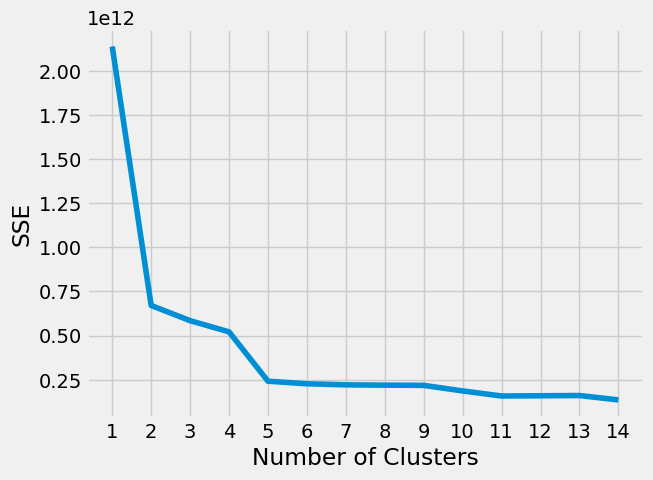

In [60]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [51]:
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

2

In [57]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(final_scaled_features)
    score = silhouette_score(final_scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

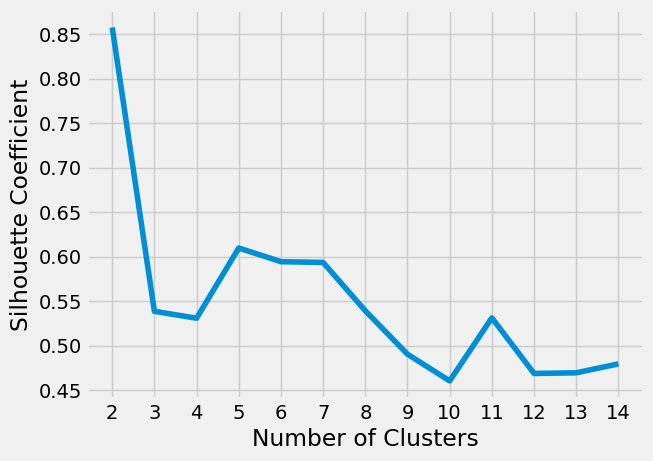

In [58]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()